# RANDOM FOREST

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [2]:
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis=1).astype("float64")
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=.25,
                                                    random_state=42)

### MODEL&TEST

In [4]:
rf_model = RandomForestRegressor(random_state=42).fit(X_train, y_train)

In [5]:
dir(rf_model)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_compute_partial_dependence_recursion',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_make_estimator',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_set_oob_score',
 '_validate_X_predict',
 '_validate_data',
 '_validate_estimator',
 '_validate_y_class_weight',
 'apply',
 'base_estimator',
 'base_estimator_',
 'bootstrap',
 'ccp_alpha',
 'class_weight',
 'criterion',
 'decision_path',
 'estimator_params

In [6]:
y_pred = rf_model.predict(X_test)

In [7]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

345.00286717448006

In [8]:
r2_score(y_test, y_pred)

0.45016046218971983

### MODEL TUNIG

In [9]:
rf_model = RandomForestRegressor(random_state=42).fit(X_train, y_train)

In [10]:
rf_params = {"max_depth": [5, 8, 10],
             "max_features": [2, 5, 10],
             "n_estimators": [200, 500, 1000, 2000],
             "min_samples_split": [2, 10, 80, 100]}

In [11]:
rf_cv_model = GridSearchCV(rf_model, rf_params, cv=5, verbose=2, n_jobs=-1).fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   51.6s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 17.3min finished


In [12]:
rf_cv_model.best_params_

{'max_depth': 10,
 'max_features': 2,
 'min_samples_split': 2,
 'n_estimators': 2000}

In [14]:
rf_tuned = RandomForestRegressor(max_depth=10,
                                 max_features=2,
                                 min_samples_split=2,
                                 n_estimators=2000,
                                 random_state=42).fit(X_train, y_train)

In [15]:
y_pred = rf_tuned.predict(X_test)

In [16]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

346.0831442735748

In [17]:
r2_score(y_test, y_pred)

0.44671174303610206

### Değişken Önem Düzeyi

Text(0.5, 0, 'Variable Importance')

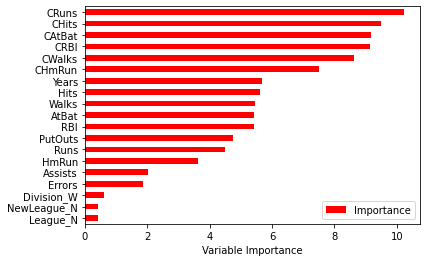

In [26]:
Importance = pd.DataFrame({"Importance":rf_tuned.feature_importances_*100},
                           index=X_train.columns)
Importance.sort_values(by="Importance",
                       axis=0,
                       ascending=True).plot(kind="barh",
                                            color="r")  # ascerding --> büyükten küçüğe
plt.xlabel("Variable Importance")
# plt.gca().legend_ = None